In [1]:
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch
import torchvision
from fastai import *
from fastai.vision import *
import numpy as np


#processing tokens

import unicodedata 
import re
import inflect 

#tokenize
from nltk import word_tokenize, sent_tokenize

#find ngrams
from nltk.util import ngrams

import time
from tqdm import tqdm

#nn
import torch.nn as nn
from torch import optim
from sklearn import preprocessing

import arpa

# CUDA INIT

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.cuda.get_device_name(0))
print(torch.cuda.is_available())


GeForce GTX 1060 6GB
True


In [5]:
#inputs = torch.load('../../pickles/50-50_5input_4793918').transpose(-2,1).float()
#outputs = torch.load('../../pickles/50-50_output_4793918').flatten().float()
inputs = torch.load('../../pickles/old/input_6903410_file').transpose(-2,1).float()
outputs = torch.load('../../pickles/old/output_6903410_file').flatten().float()

print(inputs)
print(outputs)
inputs = 1/inputs

tensor([[6.0000e+00, 2.0000e+00, 6.0000e+00, 5.6900e+02],
        [5.0000e+00, 3.0000e+00, 5.6690e+03, 7.2983e+04],
        [5.0000e+00, 2.0000e+00, 9.7130e+03, 1.7187e+05],
        ...,
        [2.3000e+01, 2.0000e+00, 3.0000e+00, 4.5200e+02],
        [2.3000e+01, 5.0000e+00, 1.4000e+01, 1.7000e+01],
        [2.3000e+01, 3.0000e+00, 4.0000e+00, 2.2880e+03]], device='cuda:0')
tensor([0.1735, 0.3891, 0.2083,  ..., 0.0453, 0.1708, 0.0846], device='cuda:0')


In [ ]:
if device.type == 'cuda':
    #print(torch.cuda.get_device_name(0))
    print('\nMemory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**2,1), 'MB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**2,1), 'MB')

In [6]:
if device.type == 'cuda':
    #print(torch.cuda.get_device_name(0))
    print('\nMemory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**2,1), 'MB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**2,1), 'MB')


Memory Usage:
Allocated: 132.3 MB
Cached:    348.0 MB


# NN INIT

In [89]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 4)
        self.fc2 = nn.Linear(4, 3)
        self.fc3 = nn.Linear(3, 1)

        
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x)) 
        x = torch.sigmoid(self.fc3(x)) 
        return x

In [90]:
net = Net().cuda()
optimizer = optim.SGD(net.parameters(), lr=0.03, momentum=0.9)

criterion = torch.nn.L1Loss()  #mean absolute error
#criterion = torch.nn.MSELoss()  #mean square error

In [91]:
## run the model for 3 epochs
#for epoch in range(0,3):
for x in tqdm(range(len(inputs)),position=0, leave=True):
    if x % 15 == 1:
        optimizer.zero_grad() #reset gradients

        ## 1. forward propagation
        net_out = net((inputs[x:x+1,:]))

        ## 2. loss calculation
        loss = criterion(net_out, outputs[x].reshape(1,1))
        #print(target[x])

        ## 3. backward propagation
        loss.backward()

        ## 4. weight optimization
        optimizer.step()

100%|██████████| 6903410/6903410 [10:36<00:00, 10853.49it/s]


# RESULTS

In [94]:
net_results = np.zeros(int(len(inputs)/15)+1)
actual_results = np.zeros(int(len(inputs)/15)+1)

'''
#difference =np.zeros(len(inputs))
net_results = np.zeros(len(inputs))
actual_results = np.zeros(len(inputs))
'''
count = 0

for x in tqdm(range(len(inputs)),position=0, leave=True):
    if x%15 == 1:
        net_results[count] = net(inputs[x:x+1,:])
        #ins = torch.tensor([[inputs[x:x+1,0]/inputs[x:x+1,1],inputs[x:x+1,2],inputs[x:x+1,3]]], device = device)
        #net_results[count] = net(ins)
        actual_results[count] = outputs[x]
        #ifference[count] = abs(net_results[count] - actual_results[count])
        count += 1

net_results.sort()
actual_results.sort()
#difference.sort()

100%|██████████| 6903410/6903410 [01:59<00:00, 57796.98it/s]


# 4-4-3-1

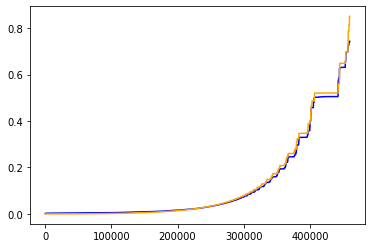

In [95]:
plt.plot(net_results,'b')
plt.plot(actual_results,'orange')
plt.show()

In [96]:
print(net_results)
print(actual_results)

[0.001915 0.001915 0.001915 0.001915 ... 0.743472 0.743472 0.743472 0.743472]
[1.989872e-06 1.989872e-06 1.989872e-06 1.989872e-06 ... 8.512390e-01 8.512390e-01 8.512390e-01 8.512390e-01]


# 4-4-4-1

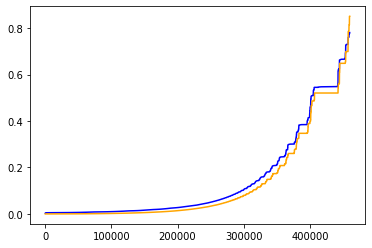

In [88]:
plt.plot(net_results,'b')
plt.plot(actual_results,'orange')
plt.show()

# 4-4-1

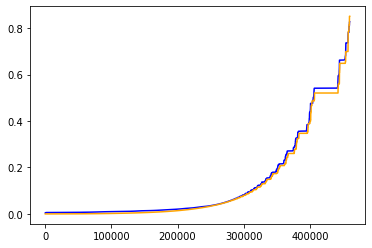

In [76]:
plt.plot(net_results,'b')
plt.plot(actual_results,'orange')
plt.show()

In [77]:
print(net_results)
print(actual_results)

[0.004167 0.004167 0.004167 0.004167 ... 0.826997 0.827256 0.827505 0.827803]
[1.989872e-06 1.989872e-06 1.989872e-06 1.989872e-06 ... 8.512390e-01 8.512390e-01 8.512390e-01 8.512390e-01]


# 4-1

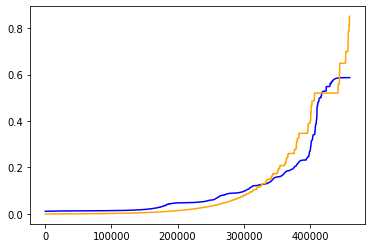

In [82]:
plt.plot(net_results,'b')
plt.plot(actual_results,'orange')
plt.show()

In [83]:
print(net_results)
print(actual_results)

[0.011507 0.011507 0.011507 0.011507 ... 0.586883 0.586883 0.586883 0.586883]
[1.989872e-06 1.989872e-06 1.989872e-06 1.989872e-06 ... 8.512390e-01 8.512390e-01 8.512390e-01 8.512390e-01]


# 4-3-1 MAE

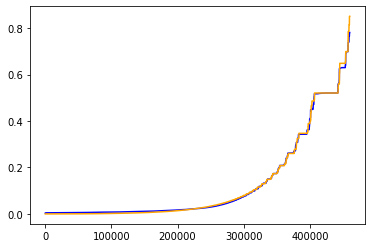

In [70]:
plt.plot(net_results,'b')
plt.plot(actual_results,'orange')
plt.show()

In [71]:
print(net_results)
print(actual_results)

[0.003455 0.003455 0.003455 0.003455 ... 0.781183 0.781183 0.781183 0.781183]
[1.989872e-06 1.989872e-06 1.989872e-06 1.989872e-06 ... 8.512390e-01 8.512390e-01 8.512390e-01 8.512390e-01]
